In [71]:
library(tidyverse)
library(ggridges)
library("viridis")

In [2]:
df = read_csv("movies.csv")

Warning message:
"Missing column names filled in: 'X1' [1]"
Parsed with column specification:
cols(
  .default = col_double(),
  Title = col_character(),
  Release_Date = col_date(format = ""),
  MPAA_Rating = col_character(),
  Distributor = col_character(),
  Source = col_character(),
  Major_Genre = col_character(),
  Creative_Type = col_character(),
  Director = col_character(),
  month_name = col_character(),
  day_of_week = col_character()
)

See spec(...) for full column specifications.



In [81]:
genre <- 'Comedy'
year_info <- c(1900, 1980)
options(repr.plot.width = 10, repr.plot.height = 10)

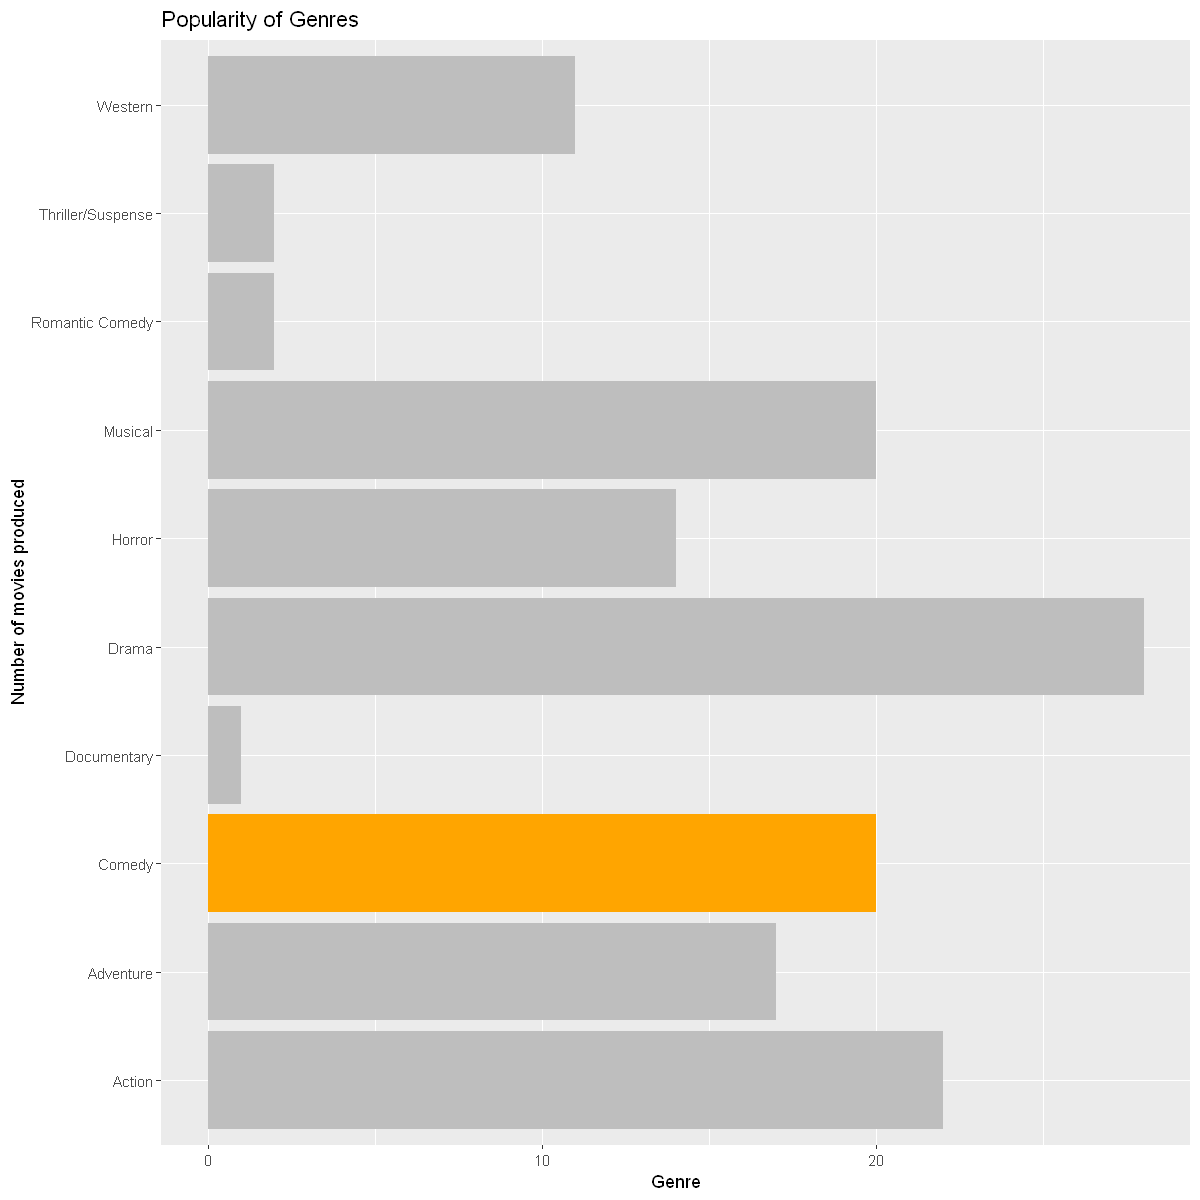

In [82]:
count_per_genre <- function(genre = 'Comedy', year_info = c(1950,2010)) {
    
    # Function creates a plot of Number of movies produced vs. genre 
    # in between years
    #
    # --------
    # @param : 
    #        genre : provide a genre to highlight
    #        year_info : provide a list/vector with 2 values 
    #                    which give the start and end year to sort by
    #
    # --------
    # @Return :
    #        a plot of 'Genre' vs. 'Number of movies produced'
    #
    # --------
    # @Example : 
    #        count_per_genre('Comedy', list(1990,2010))
    #        count_per_genre('Drama', c(1990,2010))
    # --------
    
    #Filtered between the dates
    A <- df %>% filter(between(df$year, 
                           as.integer(year_info[1]), 
                           as.integer(year_info[2])))

    #Count number of movies per genre
    A <- A %>%
        drop_na(Major_Genre) %>%
        group_by(Major_Genre) %>%
        summarise(count_per_genre = n())

    #Used for highlighting specific genre
    A <- A %>%
        mutate(to_highlight = ifelse(Major_Genre == genre,"Yes", "No"))

    #Return the ggplot
    ggplot(A, aes(Major_Genre, count_per_genre, fill = to_highlight)) +
        geom_bar(stat= 'identity', position = 'dodge') +
        scale_fill_manual(values = c("Yes" = "orange", "No" = "Grey"), guide = FALSE) +
        labs(x = "Number of movies produced", y = 'Genre', title = 'Popularity of Genres') +
        coord_flip()
}
count_per_genre(genre, year_info)

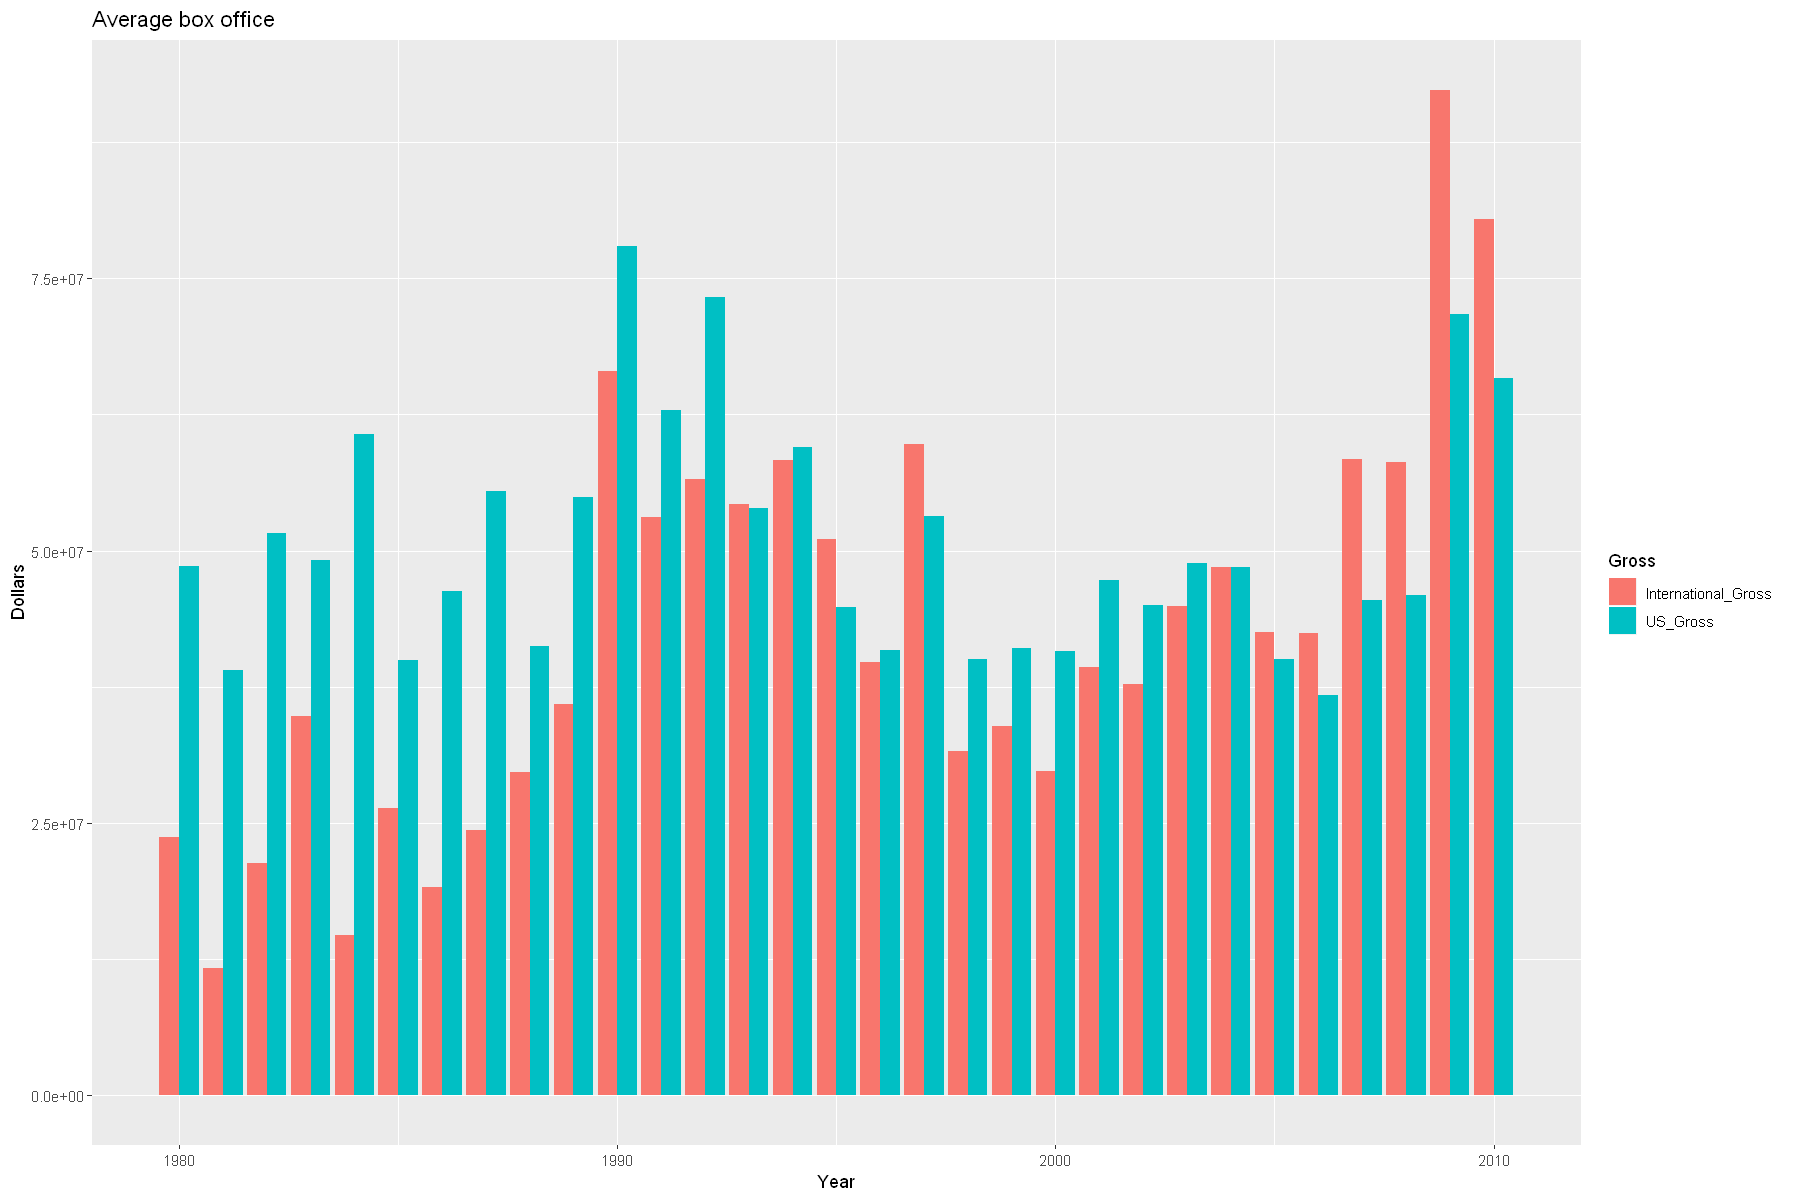

In [83]:
average_box_office <- function(genre = 'Comedy', year_info = list(1980,2010)) {
    
    # Function creates a plot of Number of movies produced vs. genre 
    # in between years
    #
    # --------
    # @param : 
    #        genre : provide a genre to highlight
    #        year_info : provide a list/vector with 2 values 
    #                    which give the start and end year to sort by
    #
    # --------
    # @Return :
    #        a plot of 'Genre' vs. 'Number of movies produced'
    #
    # --------
    # @Example : 
    #        average_box_office('Comedy', list(1990,2010))
    #        average_box_office('Drama', c(1990,2010))
    # --------
    
    #Filtered between the dates
    B <- df %>% filter(between(df$year, 
                           as.integer(year_info[1]), 
                           as.integer(year_info[2])))

    #Evaluate international gross, gather for tidy format
    B <- B %>%
        drop_na(Major_Genre) %>%
        mutate(International_Gross = Worldwide_Gross - US_Gross) %>%
        select(Major_Genre, year, US_Gross, International_Gross) %>%
        gather(key = 'Gross', value = 'amount', -Major_Genre, -year) %>%
        group_by(year, Gross) %>%
        summarise(amount = mean(amount))

    #Return the ggplot
    B_plot <- ggplot(B, aes(year, amount, fill = Gross)) +
        geom_bar(stat= 'identity', position = 'dodge') +
        labs(x = "Year", y = 'Dollars', title = 'Average box office') 
    
    B_plot

}

options(repr.plot.width = 15)
average_box_office()

Picking joint bandwidth of 0.357



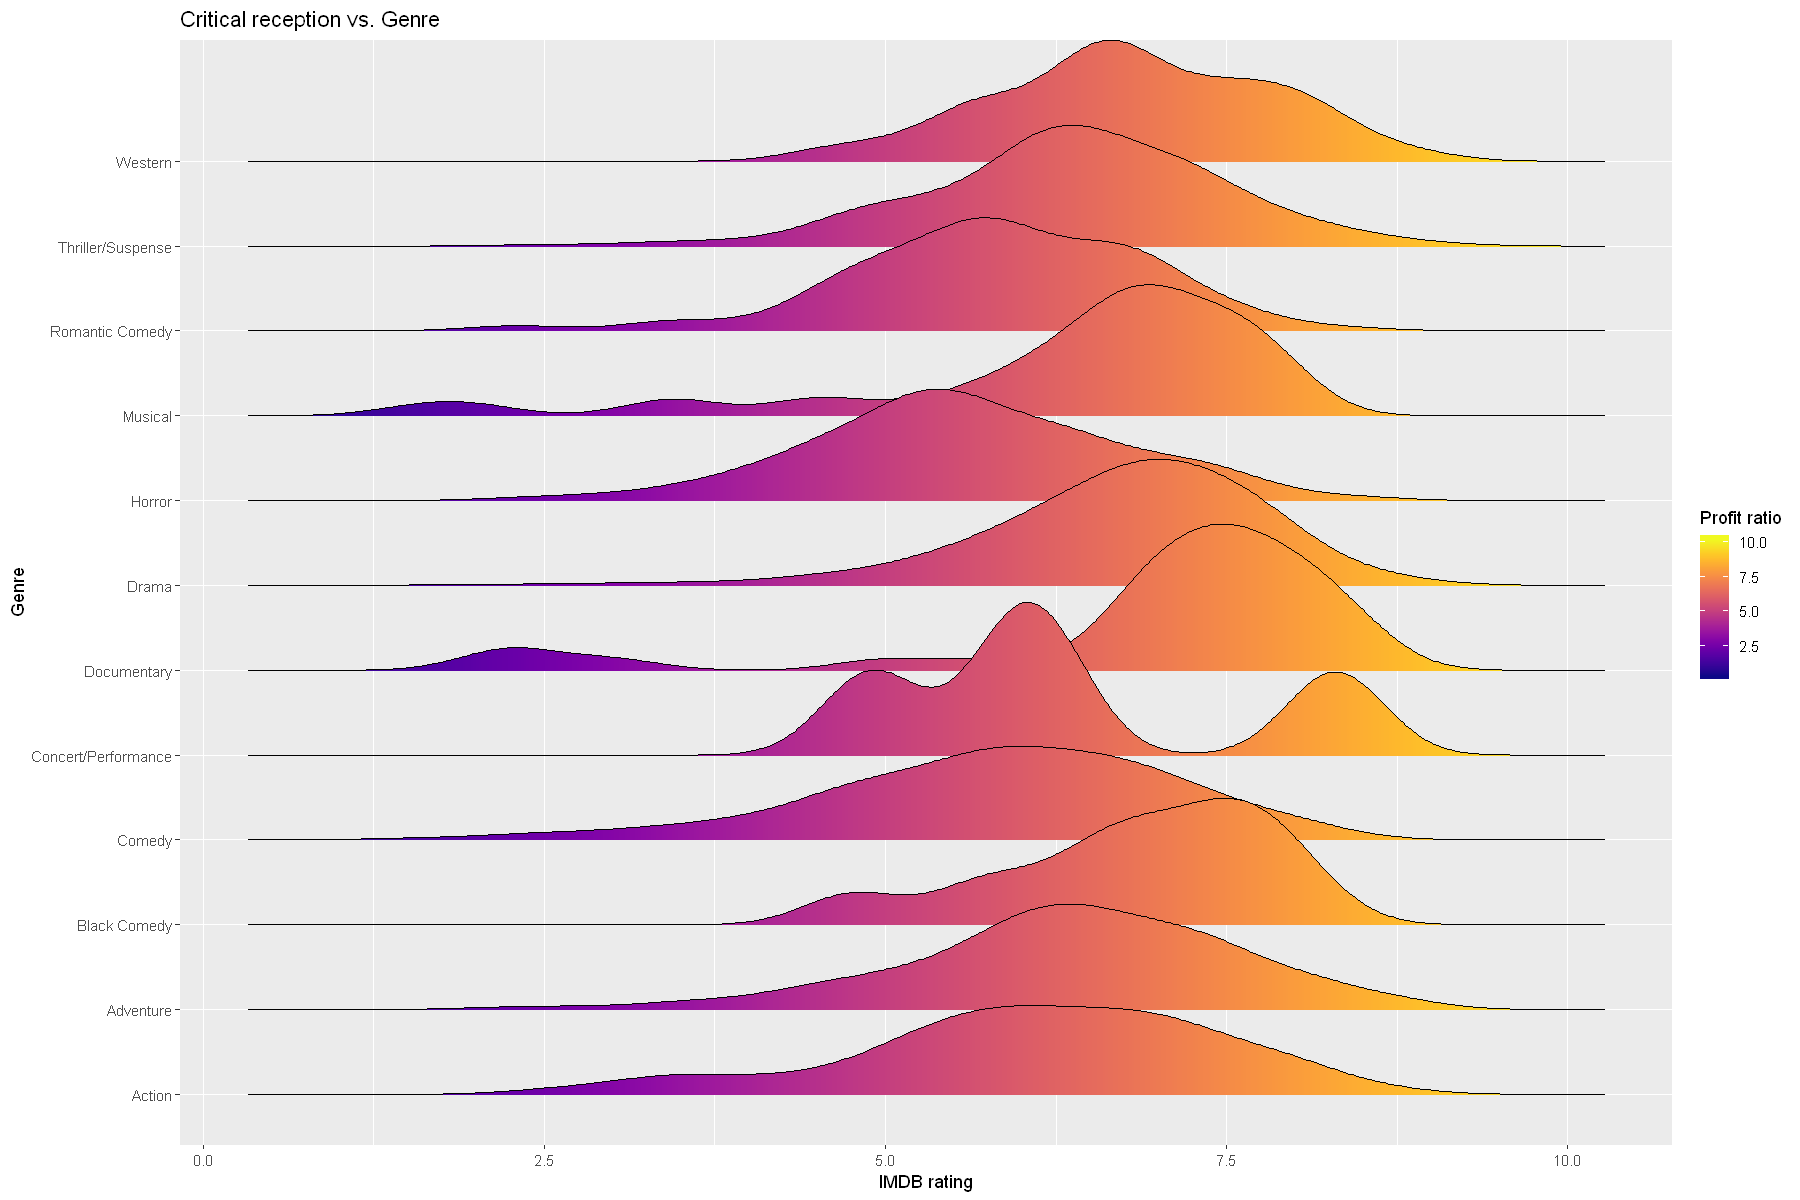

In [95]:
violinplot <- function(genre = 'Comedy', year_info = list(1950,2010)) {
    
    # Function creates a heatmap of profit ratio vs. IMDB rating
    # in between years
    #
    # --------
    # @param : 
    #        genre : provide a genre to highlight
    #        year_info : provide a list/vector with 2 values 
    #                    which give the start and end year to sort by
    #
    # --------
    # @Return :
    #        a plot of 'Genre' vs. 'Number of movies produced'
    #
    # --------
    # @Example : 
    #        heatmap('Comedy', list(1990,2010))
    #        heatmap('Drama', c(1990,2010))
    # --------
    
    #Filtered between the dates
    C <- df %>% filter(between(df$year, 
                           as.integer(year_info[1]), 
                           as.integer(year_info[2])))

    #Evaluate international gross, gather for tidy format
    C <- C %>%
        drop_na(Major_Genre) %>%
        subset(profit_ratio <= 20) 
        


    #Return the ggplot
    C_plot <- ggplot(C, aes(y = Major_Genre , 
                            x = IMDB_Rating,
                            color = profit_ratio,
                            fill = ..x..
                            #fill 
                           )) +
                geom_density_ridges_gradient(alpha = 0.2) +
                scale_fill_viridis(option = 'plasma', name = 'Profit ratio') +
                labs(x = 'IMDB rating', 
                     y = 'Genre', 
                     title = 'Critical reception vs. Genre',
                     legend = 'Profit ratio')
    C_plot 
}
violinplot()